# Лабораторная работа №2
## Выполнили Смирнов Егор и Максимов Артем

In [98]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [99]:
def points_generator(count):
    pts_list = []
    for i in range(count):
        pts_list.append([random.randint(0,10), random.randint(0,10)])
    end_list = np.unique(pts_list, axis=0)   
    return end_list.tolist()

In [100]:
def picture(count):
    pts_list = points_generator(count)
    x_list = [x for [x,y] in pts_list]
    y_list = [y for [x,y] in pts_list]
    
    plt.figure()
    plt.scatter(0.0, 10.0)
    plt.plot(x_list, y_list,'ro')
    plt.grid()
    plt.show()
    return pts_list

The blue point is a lie!

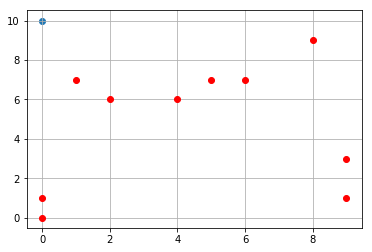

In [101]:
list = picture(10)

    Def Get Hull Points (point list):  
       Find the min x, max in list of points  
       Hull pts = Quick Hull (point list, min, max)  
       Hull pts = Hull pts + Quick Hull (point list, max, min)  
       Return Hull pts


In [102]:
def get_hull_points(pts_list):
    hull_points = []
    min_point, max_point = find_min_max_pts(pts_list)
    
    hull_points = quick_hull(pts_list, min_point, max_point)
    hull_points += (quick_hull(pts_list, max_point, min_point))
    return hull_points

In [103]:
def find_min_max_pts(pts_list):
    x_list = [x for [x,y] in pts_list]
    x_max = max(x_list)
    x_min = min(x_list)
    min_point = [[x,y] for [x,y] in pts_list if x == x_min]
    max_point = [[x,y] for [x,y] in pts_list if x == x_max]
    return min_point[0], max_point[0]

    Def Quick Hull (point list, min, max)  
   
       New pt list = Find all the points left of the line (min, max)  
       ptC = A point on the left side with the greatest distance from the line  
       if a ptC was not found  
           then return the max point  
       Hull points = Quick Hull (New pt list, min, ptC)  
       Hull points = Hull points + Quick Hull (New pt list, max, ptC)  
       Return Hull points  

In [104]:
def quick_hull(pts_list, min_pt, max_pt):
    hull_points = []
    lonely_point = [[-1,-1]]
    new_pts_list = get_points_above_the_line(min_pt, max_pt, pts_list)
    lonely_point[0] = find_lonely_point(new_pts_list, min_pt, max_pt)
    if lonely_point[0] == [-1,-1]:
        return max_pt
    hull_points = quick_hull(new_pts_list, min_pt, lonely_point[0])
    hull_points += quick_hull(new_pts_list, lonely_point[0], max_pt)
    return hull_points

In [105]:
def get_points_above_the_line(min_pt, max_pt, pts_list):
    if len(pts_list) != 0:
        new_pts_list = [[x,y] for [x,y] in pts_list if\
                    (x - min_pt[0])*(max_pt[1] - min_pt[1]) - (y - min_pt[1]) * (max_pt[0] - min_pt[0]) < 0]
        return new_pts_list

    return pts_list

lonely point aka the most remore point

In [106]:
def find_lonely_point(pts_list, min_pt, max_pt):
    max_dist = 0
    lonely_point = [[-1,-1]]
    for pt in pts_list:
        if pt != min_pt and pt != max_pt:
            dist = calculate_distance(pt, min_pt, max_pt)
            if dist > max_dist:
                max_dist = dist
                lonely_point[0] = pt
    return lonely_point[0]

In [107]:
def calculate_distance(pt, min_pt, max_pt):
    x1 = min_pt[0]
    y1 = min_pt[1]
    x2 = max_pt[0]
    y2 = max_pt[1]
    x0 = pt[0]
    y0 = pt[1]
    nom = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denom = ((y2 - y1)**2 + (x2 - x1) ** 2) ** 0.5
    result = nom / denom
    return result

In [108]:
pts = get_hull_points(list)

Stash points in a list was a bad idea

In [125]:
def crutch(pts):
    h_pts=[]
    for i in range(0,len(pts),2):
        h_pts.append([pts[i], pts[i+1]])
    h_pts.append(h_pts[0])
    return h_pts

In [126]:
h_pts = crutch(pts)

In [127]:
def picture2(hull_pts, init_list):
    x_list = [x for [x,y] in hull_pts]
    y_list = [y for [x,y] in hull_pts]

    x_list_old = [x for [x,y] in init_list]
    y_list_old = [y for [x,y] in init_list]

    plt.figure()
    plt.scatter(0.0, 10.0)
    plt.plot(x_list, y_list)
    plt.plot(x_list_old, y_list_old, 'ro')
    plt.grid()
    plt.show()


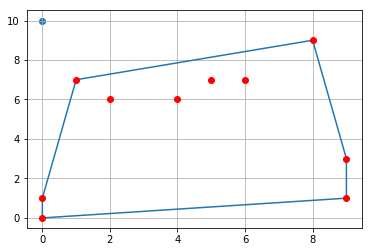

In [128]:
picture2(h_pts, list)

It works!

Another one try

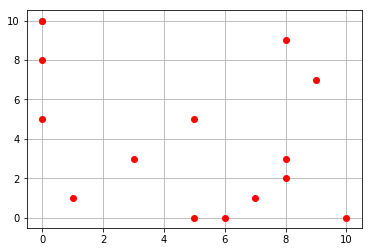

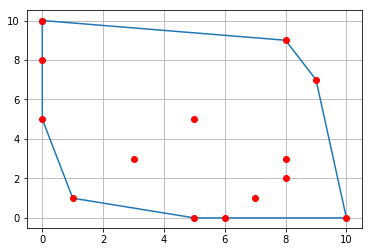

In [131]:
list2 = picture(15)
pts2 = get_hull_points(list2)
h_pts2 = crutch(pts2)
picture2(h_pts2, list2)